<a href="https://colab.research.google.com/github/Bambukabir/Al-arbah-business-center-website/blob/main/DECISION_TREE_CLASSIFICATION_PROJECT_Predicting_TB_U_(Stunting_Status).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1. Mount the drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Step 2. Import libraries


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import joblib


#Step 3 — Load the Dataset from Google Drive

In [6]:
file_path = '/content/drive/MyDrive/Data scince/data_stunting.csv'
df = pd.read_csv(file_path)

print("Your Dataset loaded successfully!")
print("First 5 rows:")
df.head()


Your Dataset loaded successfully!
First 5 rows:


,No,Date of Birth,Birth Weight,Birth Height,Weight,Height,BB/U,TB/U,BB/TB
0,1 .,2019-10-14,3,48.1,13.5,93.2,normal body weight,very short,good nutrition
1,2 .,2021-11-14,3.7,50,10.8,81.7,normal body weight,short,good nutrition
2,3 .,2021-10-07,3.8,50,10.5,83.3,normal body weight,short,good nutrition
3,4 .,2020-05-22,1.9,49,9.8,87.3,very less,very short,undernutrition
4,5 .,2019-03-10,3.3,48.3,13.3,95.9,less,short,good nutrition


#Step 4 — Clean Column Names and Drop Irrelevant Columns

In [7]:
df.columns = df.columns.str.strip()

cols_to_drop = ['No', 'Date of Birth', 'Birth Weight', 'Birth Height']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

print("Dataset Columns cleaned and unnecessary ones removed!")
print("Remaining columns:", df.columns.tolist())


Dataset Columns cleaned and unnecessary ones removed!
Remaining columns: ['Weight', 'Height', 'BB/U', 'TB/U', 'BB/TB']


# Step 5. Handle missing values in categorical columns


In [8]:
df['BB/U'] = df['BB/U'].fillna('missing')
df['BB/TB'] = df['BB/TB'].fillna('missing')

# Step 6. Drop rows with missing target (TB/U)


In [9]:
df = df.dropna(subset=['TB/U'])

# Step 7. Encode target labels


In [10]:
label_encoder = LabelEncoder()
df['TB/U'] = label_encoder.fit_transform(df['TB/U'])

# Step 8. Define features (X) and target (y)


In [11]:
X = df[['Weight', 'Height', 'BB/U', 'BB/TB']]
y = df['TB/U']


# Step 9. Split dataset into train/test sets


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 10. Preprocess columns


In [15]:
numeric_features = ['Weight', 'Height']
categorical_features = ['BB/U', 'BB/TB']
numeric_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)



# Step 13. Create Decision Tree pipeline



In [25]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        max_depth=4,
        min_samples_split=10,
        random_state=0
    ))
])


# Step 14. Train the model


In [26]:
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Weight', 'Height']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BB/U', 'BB/TB'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_split=10,
                                        random_state=0))])

# Step 15. Make predictions


In [18]:
y_pred = model.predict(X_test)

# Step 16. Evaluate performance


In [19]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7676767676767676

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        72
           1       0.61      0.41      0.49        27

    accuracy                           0.77        99
   macro avg       0.71      0.66      0.67        99
weighted avg       0.75      0.77      0.75        99


Confusion Matrix:
 [[65  7]
 [16 11]]


# Step 17. Visualize the decision tree


In [20]:
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

# Access the trained tree from the pipeline


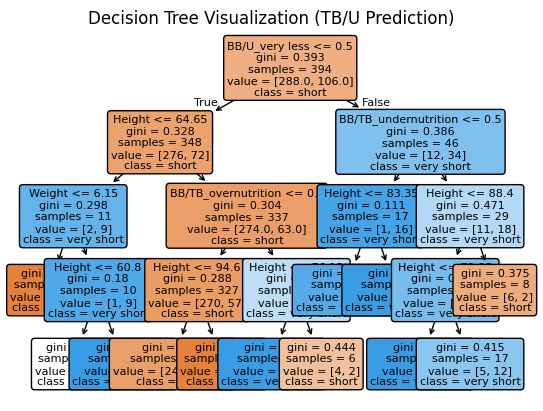

In [27]:
tree_model = model.named_steps['classifier']
feature_names = (
    numeric_features +
    list(model.named_steps['preprocessor']
             .named_transformers_['cat']
             .get_feature_names_out(categorical_features))
)
plot_tree(
    tree_model,
    feature_names=feature_names,
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Visualization (TB/U Prediction)")
plt.show()

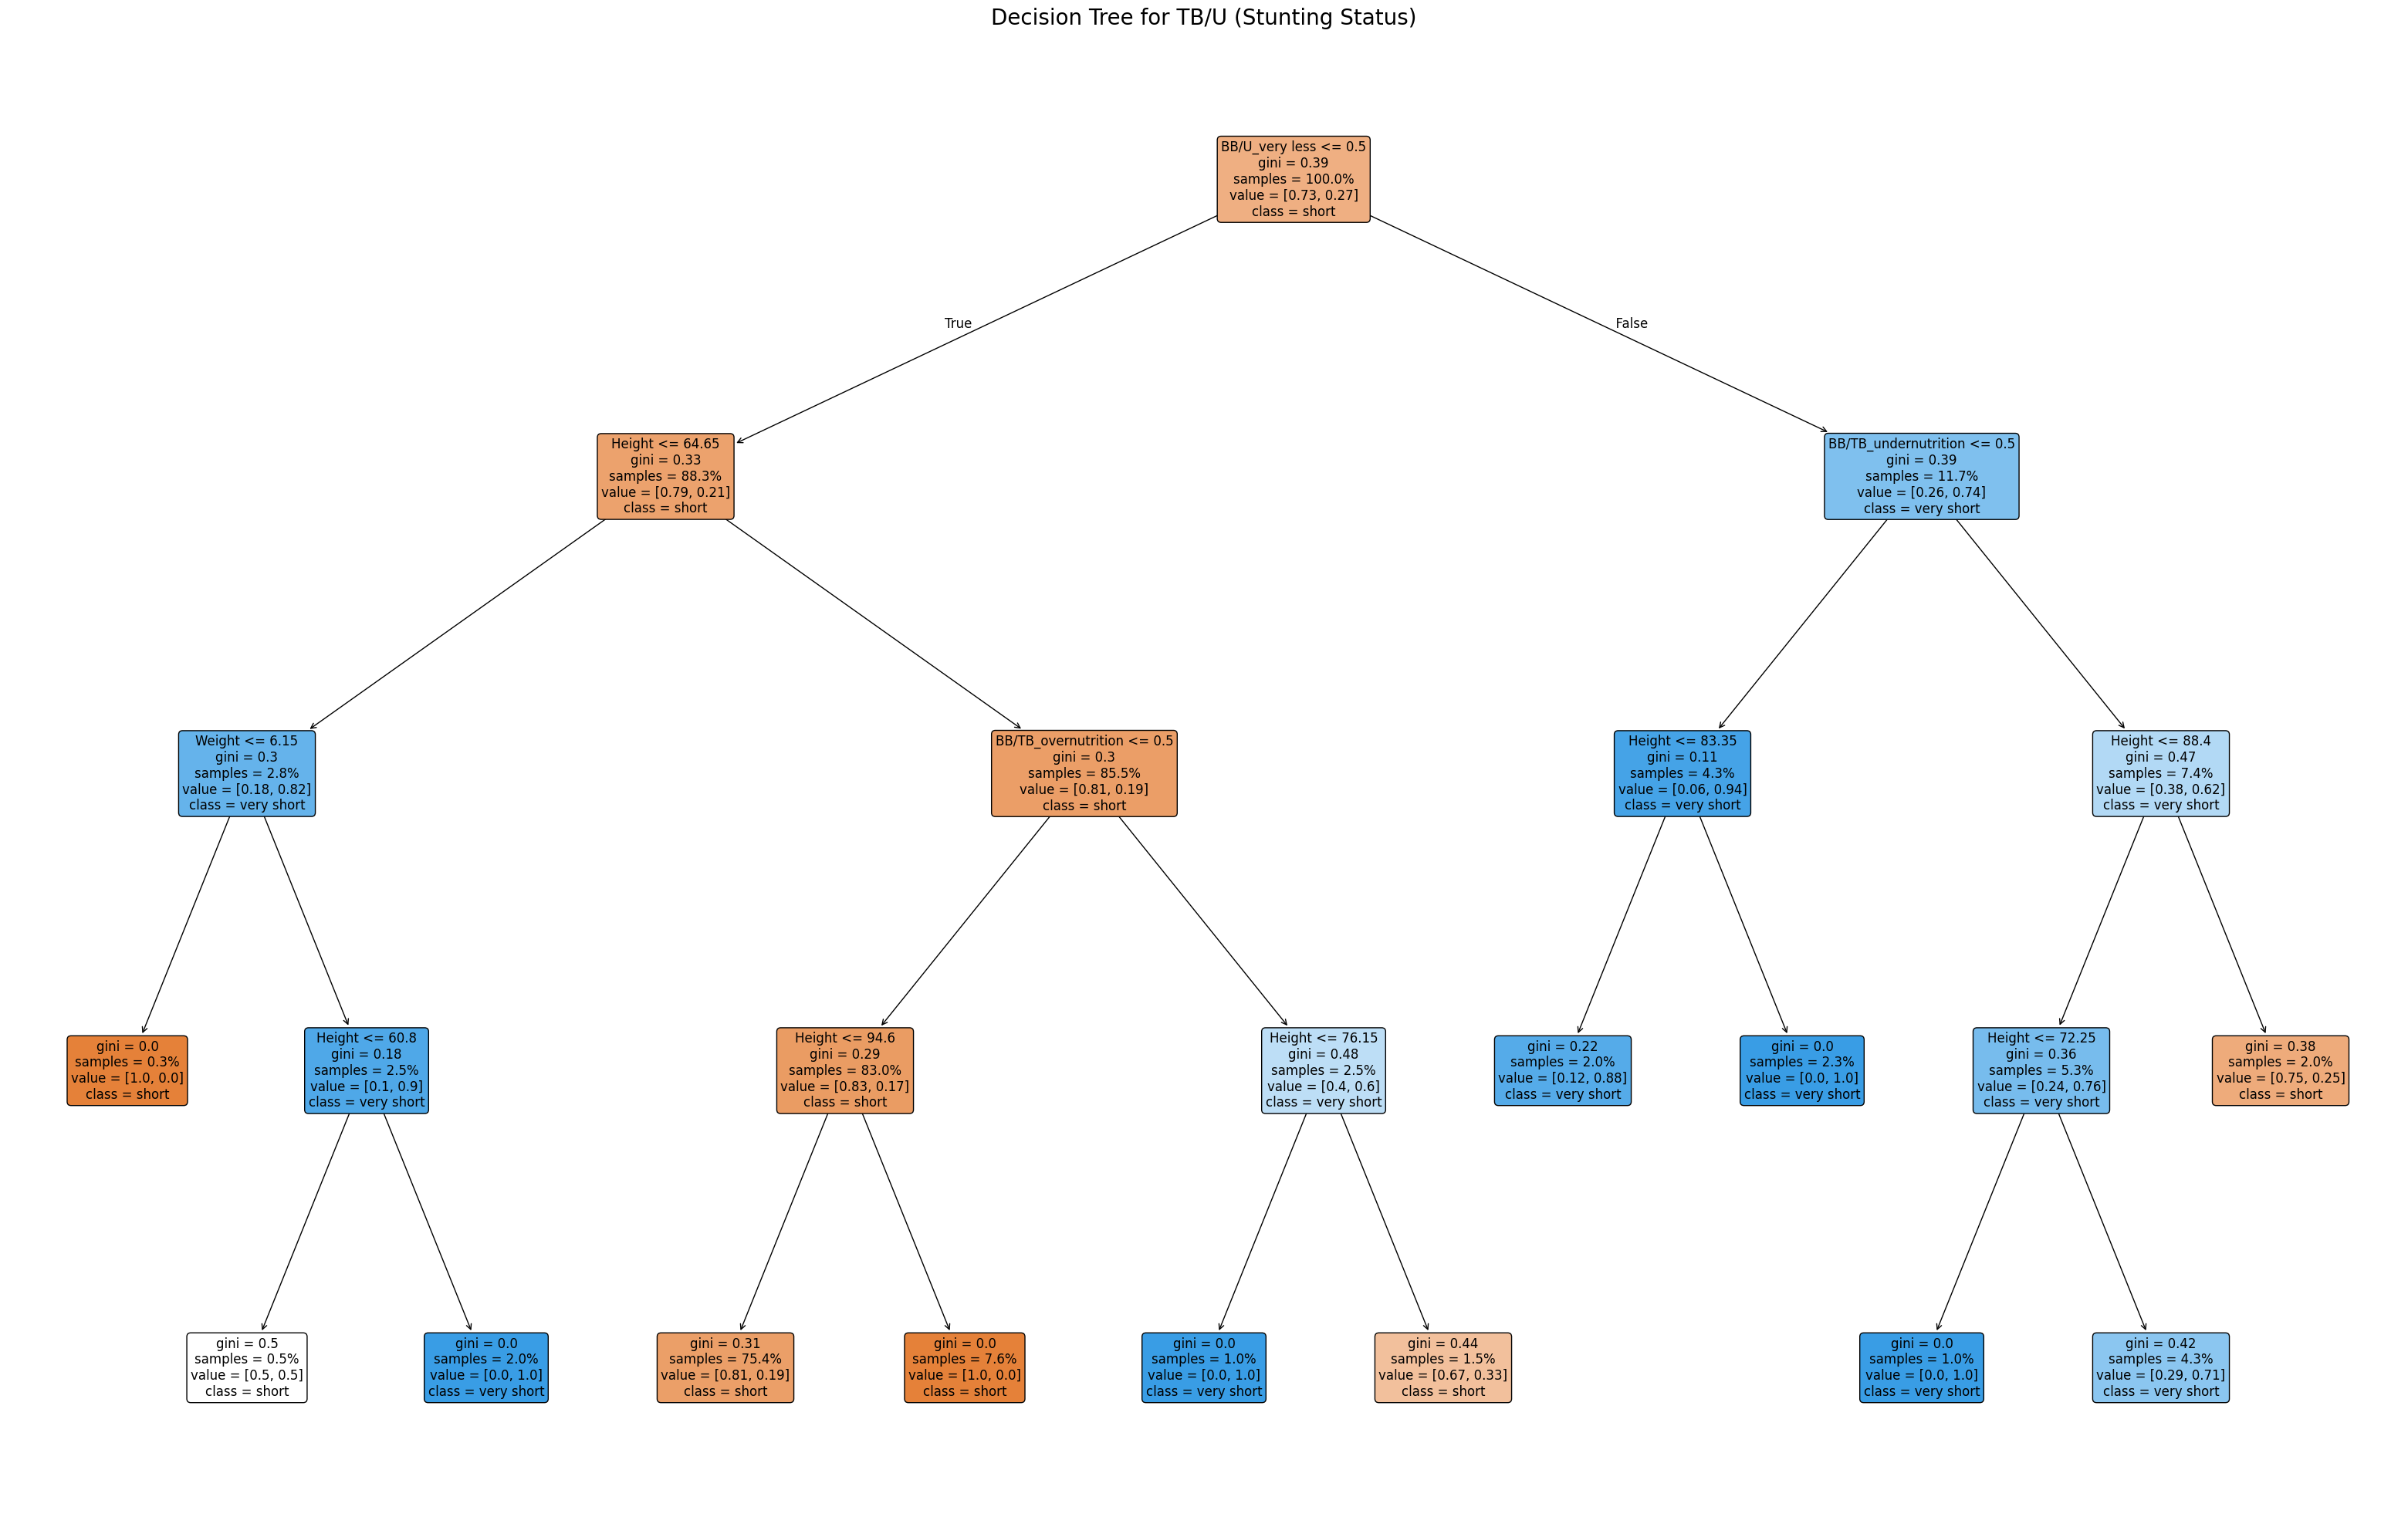

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 25))  # increase figure size (width, height)

tree.plot_tree(
    tree_model,
    feature_names=feature_names,
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=12,      # make text larger
    proportion=True,  # fit nodes proportionally
    precision=2       # reduce decimals for cleaner view
)

plt.title("Decision Tree for TB/U (Stunting Status)", fontsize=20)
plt.show()


# Step 18. Save the trained model to Drive
save_path = '/content/drive/MyDrive/Colab_Models/decision_tree_stunting.pkl'
joblib.dump(model, save_path)
print(f"\n✅ Model saved to: {save_path}")

In [32]:
save_path = '/content/drive/MyDrive/Data scince/decision_tree_stunting.pkl'
joblib.dump(model, save_path)
print(f"\n Model saved to: {save_path}")


 Model saved to: /content/drive/MyDrive/Data scince/decision_tree_stunting.pkl
